# Exercises 5

## Part 1

- Import the rocket image from skimage.data
- Check it's type
- Can you find a way to convert that RGB image to grayscale (hint: google skimage convert RGB to gray)
- Check the type of your gray scale image
- As we did in exercise 3 add some normal noise to your picture
- Try to filter your image with a median filter and a disk element with radius 3.
- You should get an error. Can you figure out how to solve it ?
- Plot the filtered image. What happened ?
- Find a threshold automatically to highlight bright regions in the image (e.g. Otsu threshold)
- Create a mask using that threshold and plot it
- The maks is not very good. Let's plot a histogram of our image and set a manual threshold to create a mask

## Part 2
- Clean-up your mask using a binary closing operation
- Label the binary regions in your mask
- Calculate the region properties using both the mask and the intensity image
- Create a list containing the area of each region
- Cerate a list containing the mean intensity of each region
- Plot one list as a function of the other
- Choosing appropriate thresholds on those two parameters, create a new mask that only contains regions corresponding to bright lights

# Solutions 5

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [2]:
#load moon image
image = skimage.data.rocket()

In [3]:
image.dtype

dtype('uint8')

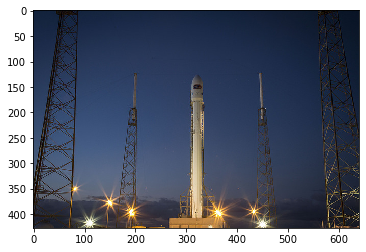

In [4]:
plt.imshow(image)
plt.show()

In [5]:
import skimage.color

In [6]:
image_gray = skimage.color.rgb2gray(image)

In [7]:
image_gray.shape

(427, 640)

In [8]:
type(image_gray[0,0])

numpy.float64

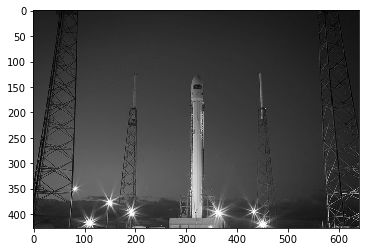

In [9]:
plt.imshow(image_gray, cmap = 'gray')
plt.show()

In [10]:
#get shape of image
image_gray.shape

(427, 640)

In [12]:
#generate normal noise
normal_matrix = np.random.standard_normal((image_gray.shape[0], image_gray.shape[1]))

#add it to the image
noisy_image = image_gray + 0.1*normal_matrix

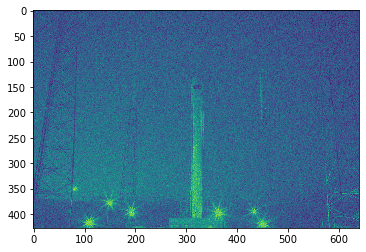

In [13]:
plt.imshow(noisy_image)
plt.show()

In [14]:
from skimage.filters import median
from skimage.morphology import disk

In [15]:
#median filter the image
image_median = median(noisy_image, selem=disk(3))

We get an error saying that the function  only accepts values from -1 to 1 if the input is of float type. Our original image was of integer type but since we added noise, it is now float. Let's verify the help for the median function:

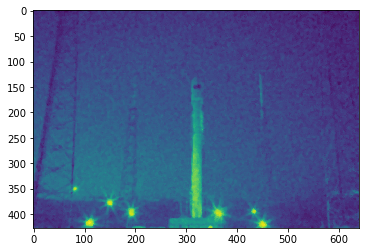

In [18]:
plt.imshow(image_median)
plt.show()

In [22]:
import skimage.filters

In [23]:
threshold = skimage.filters.threshold_otsu(image_median)
threshold

0.28377484806236875

In [24]:
mask = image_median>threshold

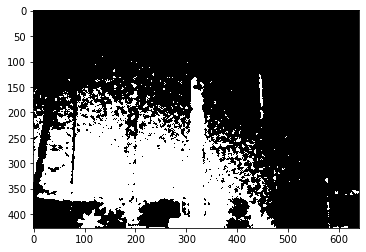

In [25]:
plt.imshow(mask, cmap = 'gray')
plt.show()

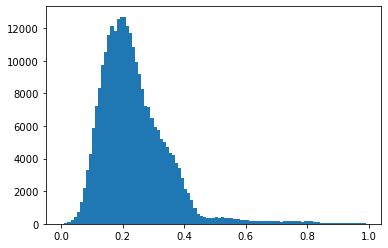

In [27]:
plt.hist(np.ravel(image_median),bins = np.arange(0,1,0.01))
plt.show()

There's a small dip around 0.45. Let's try that as a threshold:

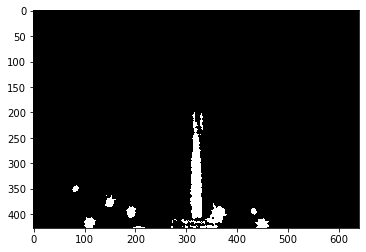

In [52]:
mask = image_median>0.55

plt.imshow(mask, cmap = 'gray')
plt.show()

## Part 2

In [53]:
from skimage.morphology import binary_opening, disk

In [54]:
mask_closed = binary_opening(mask, selem=disk(2))

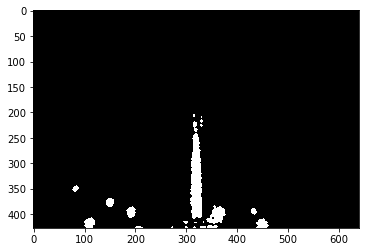

In [55]:
plt.imshow(mask_closed, cmap = 'gray')
plt.show()

In [56]:
from skimage.measure import label, regionprops

In [57]:
image_label = label(mask_closed)
regions = regionprops(image_label, image_median)

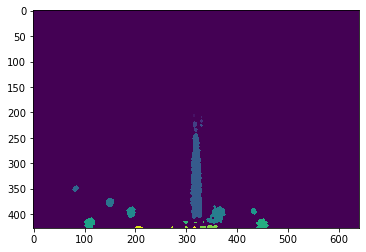

In [58]:
plt.imshow(image_label)
plt.show()

In [59]:
area = [x.area for x in regions]
mean_intensity = [x.mean_intensity for x in regions]


In [60]:
mean_intensity

[0.6011707591969452,
 0.5976254662787436,
 0.5942767455002641,
 0.5911426857268407,
 0.5999044159776548,
 0.7148557277909798,
 0.7170604408348257,
 0.7629590149685812,
 0.7011049793951867,
 0.7715652357057654,
 0.7656030322440992,
 0.7945731304654114,
 0.7798256158324283,
 0.5729266690385674,
 0.563879855883503,
 0.564351316605336,
 0.6438526125478738,
 0.5948095396348381,
 0.5739600396730006,
 0.6138045786026685,
 0.5876424460956543]

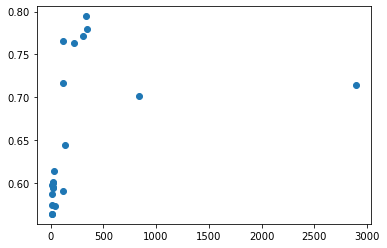

In [61]:
plt.plot(area, mean_intensity,'o')
plt.show()

In [62]:
image_label.shape

(427, 640)

In [63]:
newmaks = np.zeros(image_label.shape)
for x in regions:
    if (x.area<500) and (x.mean_intensity>0.45):
        newmaks[x.coords[:,0],x.coords[:,1]]=1

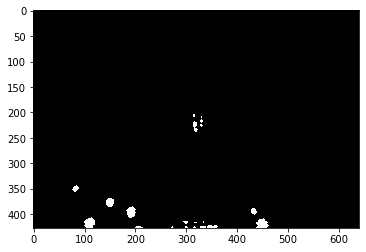

In [64]:
plt.imshow(newmaks, cmap = 'gray')
plt.show()